<a href="https://colab.research.google.com/github/ArghyaPal/AI_Course_Tutorial/blob/master/Lesson_1_Introduction_to_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Support Vector Machine

Support Vector Machine or SVM is a powerful supervised algorithm which can handle for classification and regression on complex high dimensional data. Generally, SVM is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. <br>

SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane (MMH) that best divides the dataset into classes.

> * Hyperplane
> * Margin
> * Support Vector

# A close look to the SVM?





Similar to regression, the core objective of an SVM is to generate a (or multiple) separating hyper-plane(s) to separate points of a given training set while mimimising the loss function. However, unlike linear or logistic regression, SVMs can generate highly non-linear separating hyperplanes i.e. it can separate non-linear data. The power of SVM lies within the *support vector* generation that we will demostrate shortly.

**Comparison with Logistic Regression**
![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png)

This figure underlines the limitation of a logistic or linear regressor. The distribution of data on the right can easily be separated by any of the three algorithms. However, the left distribution will generate a high loss which will lead to misclassification on either a logistic or linear regressor. As we can see, the reason for this is that the data distribution on the left is not linearly separable.

SVMs actually solve this problem by projecting this data on higher dimensions by using a method called *kernel trick*. Since kernels can project data to infinite dimensions, it is safe to assume that SVMs can separate highly non-linear data.

**A mathematical comparison**

Let us take a look at the loss function of logistic regression <br>
![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_joined.png)


As we are familiar, this is the cross entropy loss. Minimisation of this loss generates a hyper-plane that linear. The log of a sigmoid function does not allow the algorithm to create any non-linear decision surface. Note that logistic regression requires computing all data points to find the separating plane, which can be computationally expensive.


To bypass this limitation, we should focus on the hyperplane parameters that can be comnputed using a few data points. We can create a hyper-plane of any dimension and still be able to minimise the following loss function irrespecitve of the dimensionality of the data: <br>

$\frac{1}{2}\|w\|^2+C\sum_i\max(0,1-y_i(w^\intercal x_i+b))$


In the next section, we will show a few examples of how an SVM generates separating hyper-planes on generated as well as real-world datasets via utilizing support vectors.

**Hyperplane**

A hyperplane is defined as a multi-dimensional plane that divides the domain into two halves. To generate multiple partitions, we need to have mutiple hyperplanes. In general, n hyperplanes generate n+1 partitions. In two dimensions a hyperplane is simply a straight line, in 3d it is a plane. SVMs utilise hyperplanes to separate a given data distribution. Since there can be multiple hyper-planes seperating the data, we need to pick a hyperplane smartly. Thus, we introduce the concept of margin <br>
![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png)


**Margin**

A margin is defined as the amount of space between two different datapoints. In case of supervised classification, different datapoints simply means datapoints with different labels <br>
![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

Out objective is to find the hyperplane that maximizes the margin. Such a margin ensures that for any unknown data, the probability of misclassification will be lowest. We need to pick a few datapoints that define the width of a margin. Hence, we introduce the concept of support vectors.


**Support Vector**

A margin needs a set of points that defines the extremities of the margin. In real world, we have landmarks such as rivers or mountains to define a separation border; in SVMs, we have support vectors. A large number of support vectors lead to a very low training error and usually a very narrow margin. However, this also introduces the possiblity of overfitting to training data.

## Synthetic toy data
Let's generate a synthetic dataset that has 2 class, i.e. a two class classification using SVM. We will generate 40 samples, and each sample will belong to one of the 2 classes. <br>

We will take help of built-in function:<br>
`X, y = make_blobs(n_samples=40, centers=2, random_state=6)` <br>

to generate 40 samples.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
plt.title("Plot the toy data")
plt.xlabel("X direction")
plt.ylabel("Y direction")
plt.scatter(X[:, 0], X[:, 1], s=50, c=y,edgecolors='r')
plt.show()

We denote magenta dots to denote samples from class = 1, and, subsequently, yellow dots to denote samples from class = 2

## Which of the following line is a best classifier

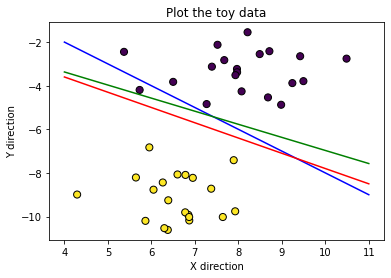

In [ ]:
plt.title("Plot the toy data")
plt.xlabel("X direction")
plt.ylabel("Y direction")
plt.scatter(X[:, 0], X[:, 1], s=50, c=y,edgecolors='k')

xfit = np.linspace(4, 11)
xfit1 = np.linspace(4, 11)
xfit2 = np.linspace(4, 11)

# First line
m = -1
c = 2
yfit = m * xfit + c

# Second line
m1 = -0.7
c1 = -0.8
yfit1 = m1 * xfit1 + c1

# Third line
m2 = -0.6
c2 = -0.97
yfit2 = m2 * xfit2 + c2


# Plot classifiers
plt.plot(xfit, yfit, '-b')
plt.plot(xfit1, yfit1, 'r')
plt.plot(xfit2, yfit2, 'g')
plt.show()

## SVM - maximizing hyperplane

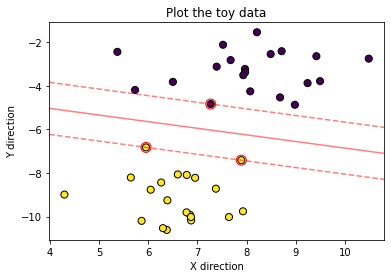

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)


plt.title("Plot the toy data")
plt.xlabel("X direction")
plt.ylabel("Y direction")
plt.scatter(X[:, 0], X[:, 1], s=50, c=y,edgecolors='k')

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# # plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='r')
plt.show()

## Now we can connect the theoritical understanding and implementation

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

In [ ]:
clf.predict([[5., 6.]])


array([0])

In [ ]:
# get support vectors
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [ ]:
# get indices of support vectors
clf.support_

array([16, 21, 30], dtype=int32)

In [ ]:
# get number of support vectors for each class
clf.n_support_

array([1, 2], dtype=int32)

# In the next tutorial we will train an SVM model on real world dataset
